##### Suponha agora que você trabalha em uma empresa de produtos perecíveis, como Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos (acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama "desova".

##### Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("desafio_02_estoque-230829-103603.csv")
df

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5
...,...,...,...
365,2022-01-02,5120,5
366,2022-01-09,4968,3
367,2022-01-16,5095,6
368,2022-01-23,4941,6


In [4]:
df.dtypes

data              object
vendas-iogurte     int64
lead-time          int64
dtype: object

In [10]:
df['data'] = df['data'].astype('datetime64[ns]')       ## transformei a coluna data no tipo datetime

In [11]:
df['Ano'] = df['data'].dt.year                     ## acrescentei uma nova coluna mostrando somente o ano
df

,data,vendas-iogurte,lead-time,Ano
0,2015-01-04,5083,4,2015
1,2015-01-11,4936,3,2015
2,2015-01-18,5051,6,2015
3,2015-01-25,4846,4,2015
4,2015-02-01,5003,5,2015
...,...,...,...,...
365,2022-01-02,5120,5,2022
366,2022-01-09,4968,3,2022
367,2022-01-16,5095,6,2022
368,2022-01-23,4941,6,2022


In [13]:
df['mediaDiaria'] = df['vendas-iogurte'] / 7                   ## acrescentei uma nova coluna mostrando a media diaria, já que os valores sao de periodos de 7 dias
df

,data,vendas-iogurte,lead-time,Ano,mediaDiaria
0,2015-01-04,5083,4,2015,726.142857
1,2015-01-11,4936,3,2015,705.142857
2,2015-01-18,5051,6,2015,721.571429
3,2015-01-25,4846,4,2015,692.285714
4,2015-02-01,5003,5,2015,714.714286
...,...,...,...,...,...
365,2022-01-02,5120,5,2022,731.428571
366,2022-01-09,4968,3,2022,709.714286
367,2022-01-16,5095,6,2022,727.857143
368,2022-01-23,4941,6,2022,705.857143


In [14]:
df.rename(columns={'vendas-iogurte':'vendasIogurte', 'lead-time':'leadTime'}, inplace=True)

c:\Users\leona\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


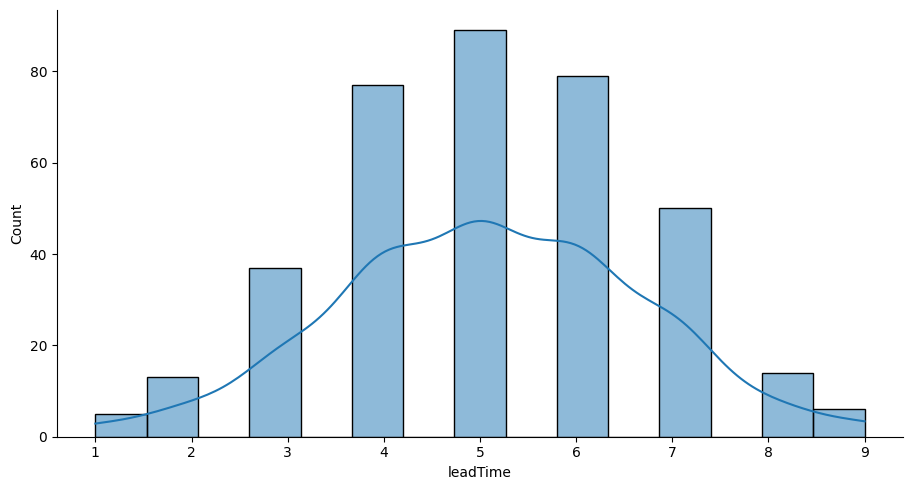

In [17]:
ax = sns.displot(df.leadTime, kde=True)
ax.figure.set_size_inches(10,5)
ax

c:\Users\leona\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


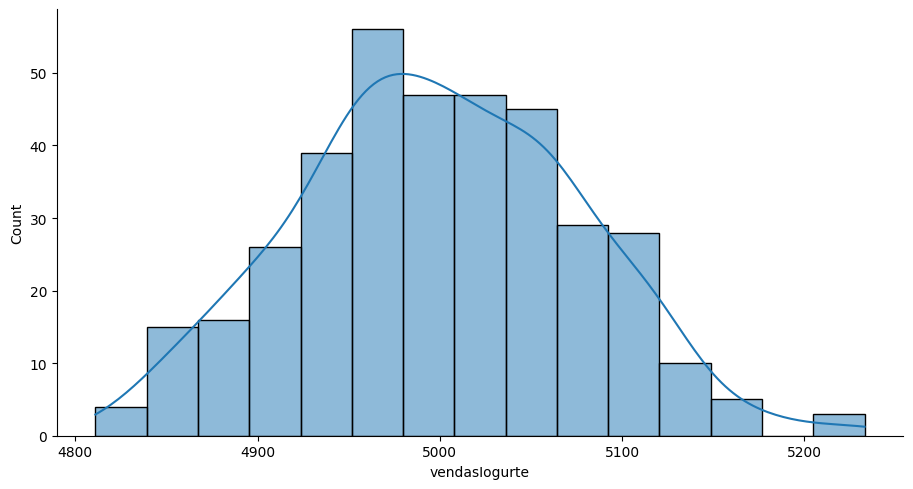

In [18]:
ax = sns.displot(df.vendasIogurte, kde=True)
ax.figure.set_size_inches(10,5)
ax

In [ ]:
## PODEMOS NOTAR QUE OS DADOS SEGUEM UMA DISTRIBUIÇÃO NORMAL, JÁ QUE SEU GRAFICO POSSUI CARACTERISTICAS SIMÉTRICAS.

In [23]:
t = df.groupby(['Ano'])['leadTime'].mean()    ## foi calculado a média, das médias anuais do lead time, de forma a obter o t
t = t.mean()
t

5.152648766328012

In [20]:
d = df.groupby(['Ano'])['mediaDiaria'].mean()    ## demanda média passada: fiz a média diária de vendas, agrupei por ano e depois fiz a media dessas médias
d = d.mean()                                     ## fiz a média diária pq os valores são de periodos de 7 dias. Quebrei esses valores por dia
d

714.6480587808418

In [24]:
desvio_padrao_demanda = df.groupby(['Ano'])['mediaDiaria'].std()      ## desvio padrao da demanda (diária), agrupado por ano, seguido da média entre esses valores anuais
desvio_padrao_demanda = desvio_padrao_demanda.mean()
desvio_padrao_demanda

10.966348034975876

In [25]:
desvio_padrao_leadtime = df.groupby(['Ano'])['leadTime'].std()        ## desvio padrao do lead time, agrupado por ano, seguido da média entre esses valores anuais
desvio_padrao_leadtime = desvio_padrao_leadtime.mean()
desvio_padrao_leadtime

1.5967342249596541

In [27]:
from scipy.stats import norm
z = norm.ppf(0.9987)
z

3.011453758499792

In [29]:
from matplotlib._api.deprecation import math
estoque_de_seguranca = z * (math.sqrt(((desvio_padrao_demanda**2)*t)+((desvio_padrao_leadtime**2)*(d**2))))  ## fórmula para calcular o estoque de segurnaça, passado na questão
estoque_de_seguranca = int(estoque_de_seguranca.round())                                                          ## valor arredondado
print('ESTOQUE DE SEGURANÇA = ', estoque_de_seguranca)

ESTOQUE DE SEGURANÇA =  3437
